# **6. Comparacion de modelos empleados (Benchmark, Balanceo, Optimizacion)**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Reds_r")
pd.set_option("display.max_columns", None)


In [69]:
df_benchmark = pd.read_csv("resultados_modelos_benchmark.csv")
df_balanceo = pd.read_csv("resultados_balanceo.csv")
df_optimizacion = pd.read_csv("resultados_optimizacion.csv")

In [70]:
columnas_base = ["Modelo", "Accuracy", "Precision", "Recall", "F1", "AUC", "Tiempo (s)"]
dfs = [df_benchmark, df_balanceo, df_optimizacion]
nombres = ["Benchmark", "Balanceo", "Optimización"]

dfs_limpios = []

for df, nombre in zip(dfs, nombres):
    for col in columnas_base:
        if col not in df.columns:
            df[col] = np.nan
    
    df = df[[col for col in columnas_base if col in df.columns]].copy()
    df["Grupo"] = nombre
    dfs_limpios.append(df)


df_todos = pd.concat(dfs_limpios, ignore_index=True)


if "Tiempo (s)" in df_todos.columns:
    df_todos = df_todos.drop(columns=["Tiempo (s)"])

## **6.1 Comparacion global de KNN**

In [71]:
df_knn = df_todos[df_todos["Modelo"].str.contains("KNN", case=False, na=False)].copy()

print(f"Se encontraron {len(df_knn)} modelos KNN:")
display(df_knn.sort_values("Recall", ascending=False))

Se encontraron 8 modelos KNN:


,Modelo,Accuracy,Precision,Recall,F1,AUC,Grupo
42,KNN - KDTree + SMOTE,0.573352,0.534701,0.572434,0.552924,0.573285,Optimización
43,KNN - Benchmark + SMOTE,0.573155,0.534564,0.571261,0.552303,0.573018,Optimización
44,KNN - BallTree + SMOTE,0.573155,0.534564,0.571261,0.552303,0.573018,Optimización
45,KNN - FAISS + SMOTE,0.573204,0.534624,0.571154,0.552286,0.601858,Optimización
8,KNN con SMOTE,0.570944,0.533375,0.551967,0.542511,0.602022,Balanceo
6,KNN,0.582244,0.551309,0.502825,0.525952,0.605303,Benchmark
9,KNN con weight=distance,0.579886,0.549892,0.487581,0.516865,0.605902,Balanceo
7,KNN sin balanceo,0.579886,0.549892,0.487581,0.516865,0.605902,Balanceo


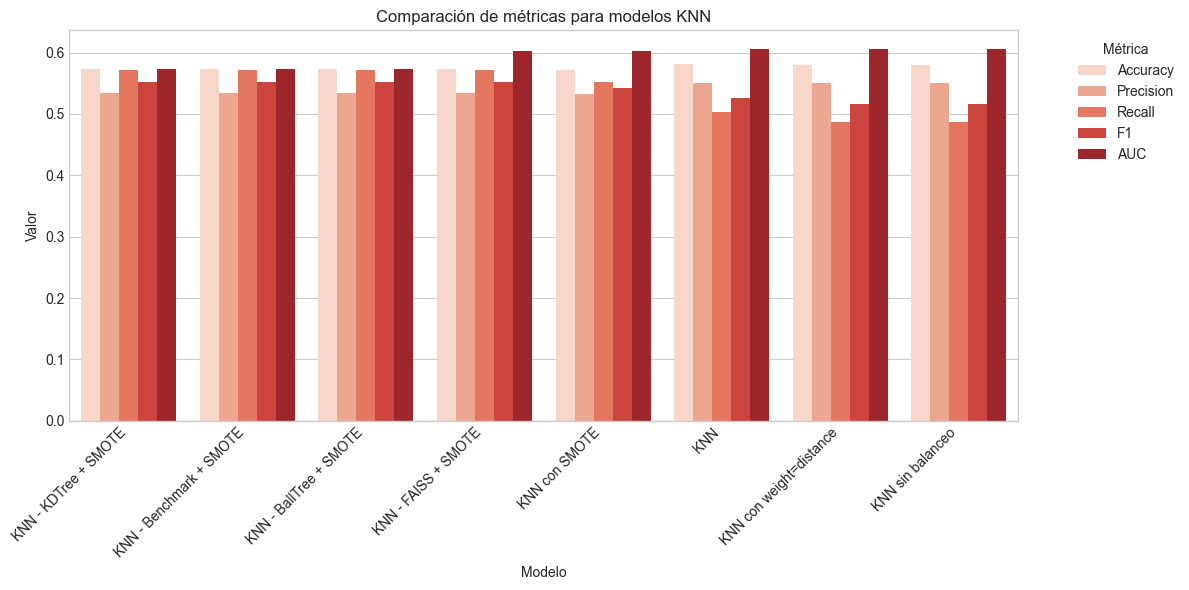

In [72]:

df_knn_sorted = df_knn.sort_values("Recall", ascending=False)
metricas = ["Accuracy", "Precision", "Recall", "F1", "AUC"]
df_knn_long = df_knn_sorted.melt(id_vars="Modelo", value_vars=metricas)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_knn_long, x="Modelo", y="value", hue="variable", palette="Reds")
plt.title("Comparación de métricas para modelos KNN")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


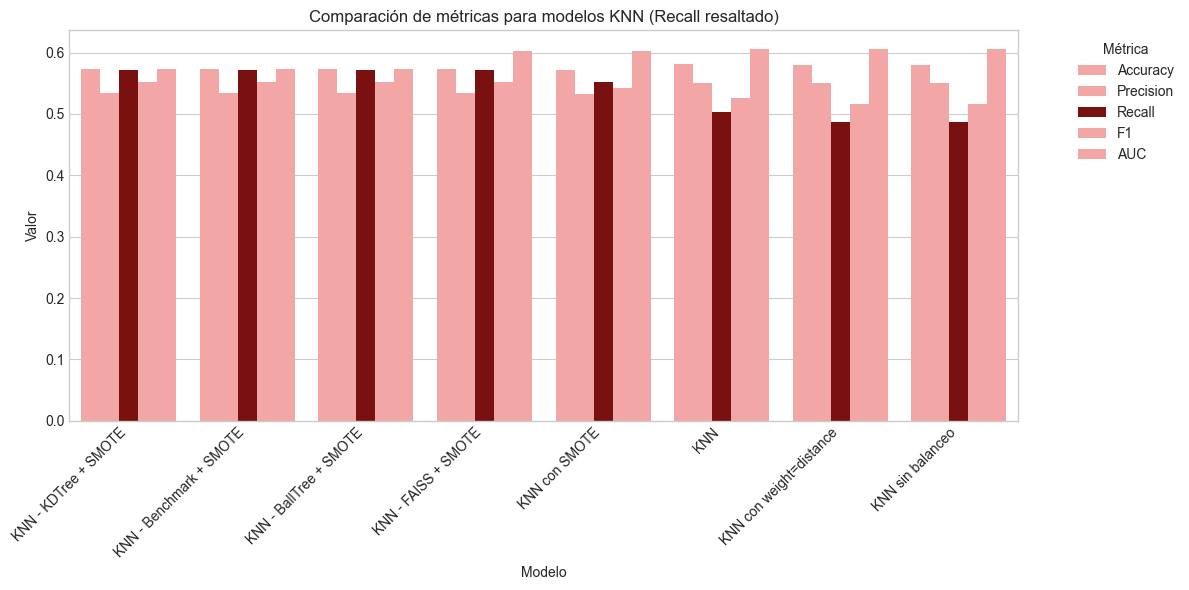

In [73]:

metricas = ["Accuracy", "Precision", "Recall", "F1", "AUC"]
df_knn_long = df_knn_sorted.melt(id_vars="Modelo", value_vars=metricas)
palette = {m: "#8B0000" if m=="Recall" else "#FF9999" for m in metricas}

plt.figure(figsize=(12, 6))
sns.barplot(data=df_knn_long, x="Modelo", y="value", hue="variable", palette=palette)
plt.title("Comparación de métricas para modelos KNN (Recall resaltado)")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## **6.2 Comparacion global de Clasificador Bayesiano**

In [74]:
df_bayes = df_todos[df_todos["Modelo"].str.contains("Bayes", case=False, na=False)].copy()

print(f"Se encontraron {len(df_bayes)} modelos de Clasificador Bayesiano:")
display(df_bayes.sort_values("Recall", ascending=False))

Se encontraron 3 modelos de Clasificador Bayesiano:


,Modelo,Accuracy,Precision,Recall,F1,AUC,Grupo
5,Naive Bayes,0.493367,0.475967,0.982731,0.641322,0.642233,Benchmark
10,Clasificador Bayesiano sin balanceo,0.493367,0.475967,0.982731,0.641322,0.642233,Balanceo
11,Clasificador Bayesiano con SMOTE,0.494252,0.476348,0.980066,0.641099,0.641488,Balanceo


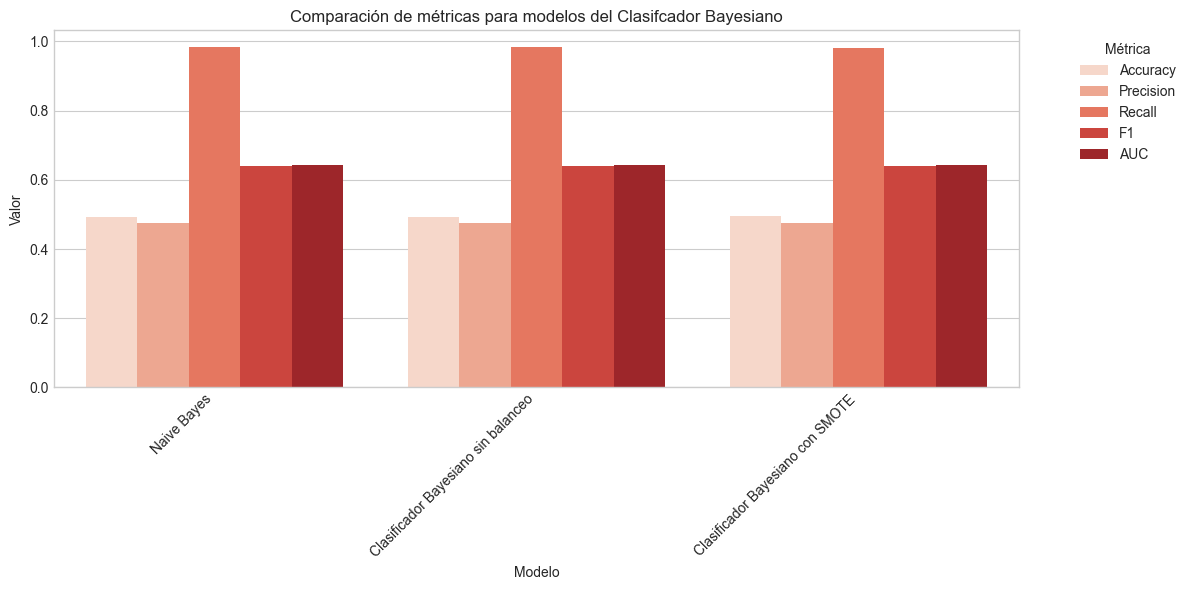

In [75]:
df_bayes_sorted = df_bayes.sort_values("Recall", ascending=False)
metricas = ["Accuracy", "Precision", "Recall", "F1", "AUC"]
df_bayes_long = df_bayes_sorted.melt(id_vars="Modelo", value_vars=metricas)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_bayes_long, x="Modelo", y="value", hue="variable", palette="Reds")
plt.title("Comparación de métricas para modelos del Clasifcador Bayesiano")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


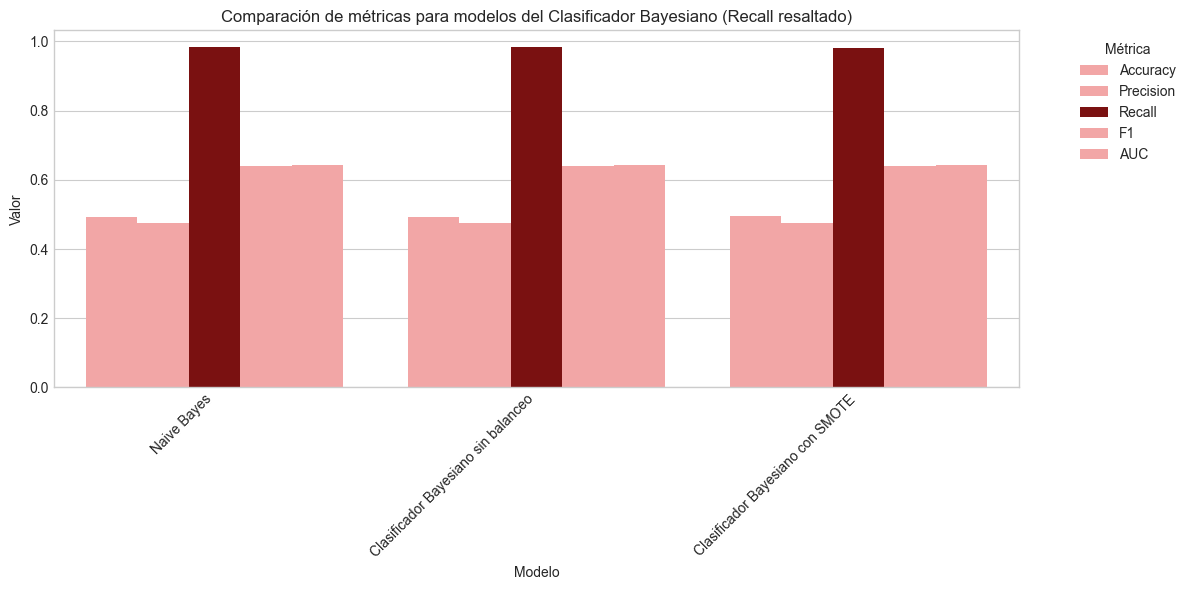

In [76]:
palette = {m: "#8B0000" if m=="Recall" else "#FF9999" for m in metricas}

plt.figure(figsize=(12, 6))
sns.barplot(data=df_bayes_long, x="Modelo", y="value", hue="variable", palette=palette)
plt.title("Comparación de métricas para modelos del Clasificador Bayesiano (Recall resaltado)")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## **6.3 Comparacion global de Regresion Logistica (L1/L2)**

In [77]:
palabras_clave = ["ridge", "lasso", "logistica", "Logística", "Regresión"]
patron = "|".join(palabras_clave)  
df_logres = df_todos[df_todos["Modelo"].str.contains(patron, case=False, na=False, regex=True)].copy()

print(f"Se encontraron {len(df_logres)} modelos de Regresion Logistica:")
display(df_logres.sort_values("Recall", ascending=False))

Se encontraron 11 modelos de Regresion Logistica:


,Modelo,Accuracy,Precision,Recall,F1,AUC,Grupo
39,Ridge (SAGA) + SMOTE,0.626363,0.596291,0.586185,0.591195,0.680046,Optimización
38,Ridge (LBFGS) + SMOTE,0.626265,0.596162,0.586185,0.591131,0.680056,Optimización
15,Regresion logistica (L2) con SMOTE,0.626265,0.596162,0.586185,0.591131,0.680056,Balanceo
17,Regresión L2 class_weight=balanced,0.629213,0.601618,0.578723,0.589948,0.681131,Balanceo
40,Lasso (SAGA) + class_weight = balanced,0.628771,0.601175,0.577977,0.589348,0.681192,Optimización
41,Lasso (Liblinear) + class_weight = balanced,0.628722,0.601131,0.577870,0.589271,0.681187,Optimización
16,Regresión L1 class_weight=balanced,0.628722,0.601131,0.577870,0.589271,0.681187,Balanceo
0,Regresión Logística L2,0.633684,0.644498,0.457627,0.535220,0.681092,Benchmark
13,Logística L2 - Sin Balanceo,0.633684,0.644498,0.457627,0.535220,0.681092,Balanceo
12,Logística L1 - Sin Balanceo,0.633438,0.644274,0.456988,0.534705,0.681109,Balanceo


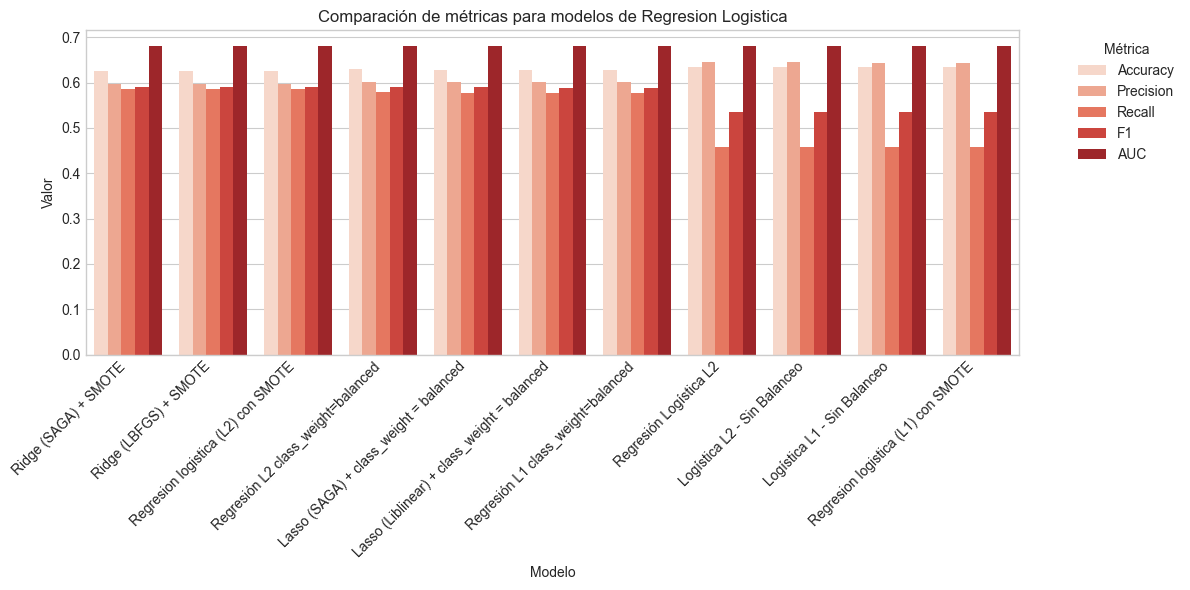

In [78]:
df_logres_sorted = df_logres.sort_values("Recall", ascending=False)
metricas = ["Accuracy", "Precision", "Recall", "F1", "AUC"]
df_logres_long = df_logres_sorted.melt(id_vars="Modelo", value_vars=metricas)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_logres_long, x="Modelo", y="value", hue="variable", palette="Reds")
plt.title("Comparación de métricas para modelos de Regresion Logistica")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


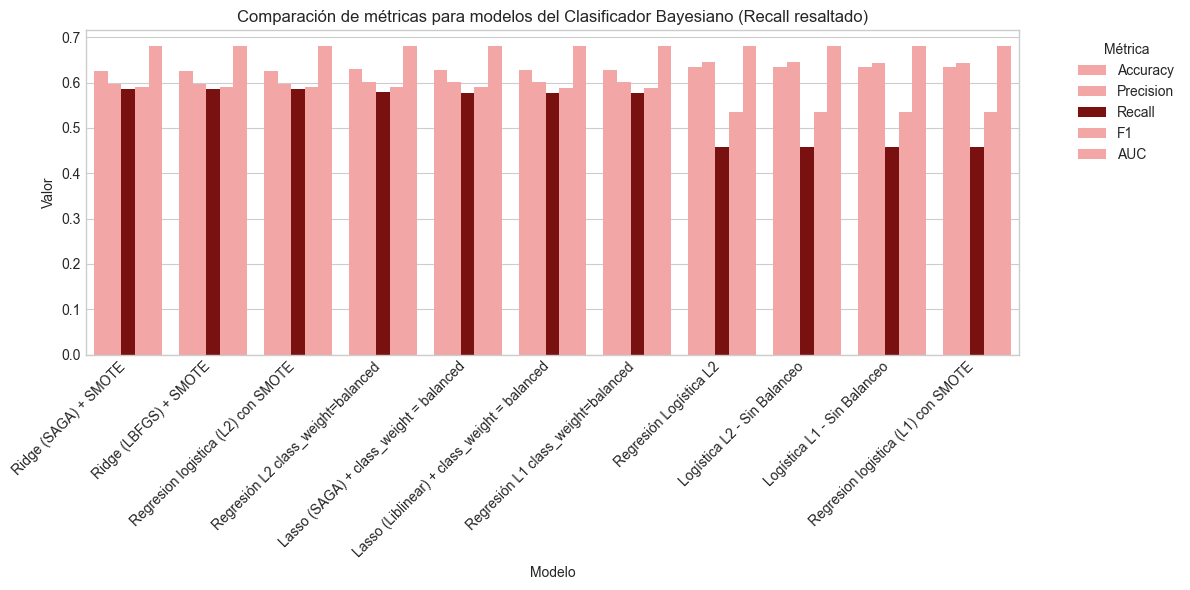

In [79]:
palette = {m: "#8B0000" if m=="Recall" else "#FF9999" for m in metricas}

plt.figure(figsize=(12, 6))
sns.barplot(data=df_logres_long, x="Modelo", y="value", hue="variable", palette=palette)
plt.title("Comparación de métricas para modelos del Clasificador Bayesiano (Recall resaltado)")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## **6.4 Comparacion global de Arbol de Decision**

In [80]:
palabras_clave = ["árbol", "arboles", "decision"]
patron = "|".join(palabras_clave)  
df_arbol = df_todos[df_todos["Modelo"].str.contains(patron, case=False, na=False, regex=True)].copy()

print(f"Se encontraron {len(df_arbol)} modelos de Arbol de Decision:")
display(df_arbol.sort_values("Recall", ascending=False))

Se encontraron 4 modelos de Arbol de Decision:


,Modelo,Accuracy,Precision,Recall,F1,AUC,Grupo
1,Árbol de Decisión,0.564852,0.527463,0.536403,0.531896,0.562778,Benchmark
18,Arboles de decision sin SMOTE,0.564852,0.527463,0.536403,0.531896,0.562778,Balanceo
19,Arboles de decision con SMOTE,0.557237,0.519229,0.531073,0.525084,0.555379,Balanceo
20,Árbol (class_weight=balanced),0.560627,0.523048,0.529794,0.526399,0.558417,Balanceo


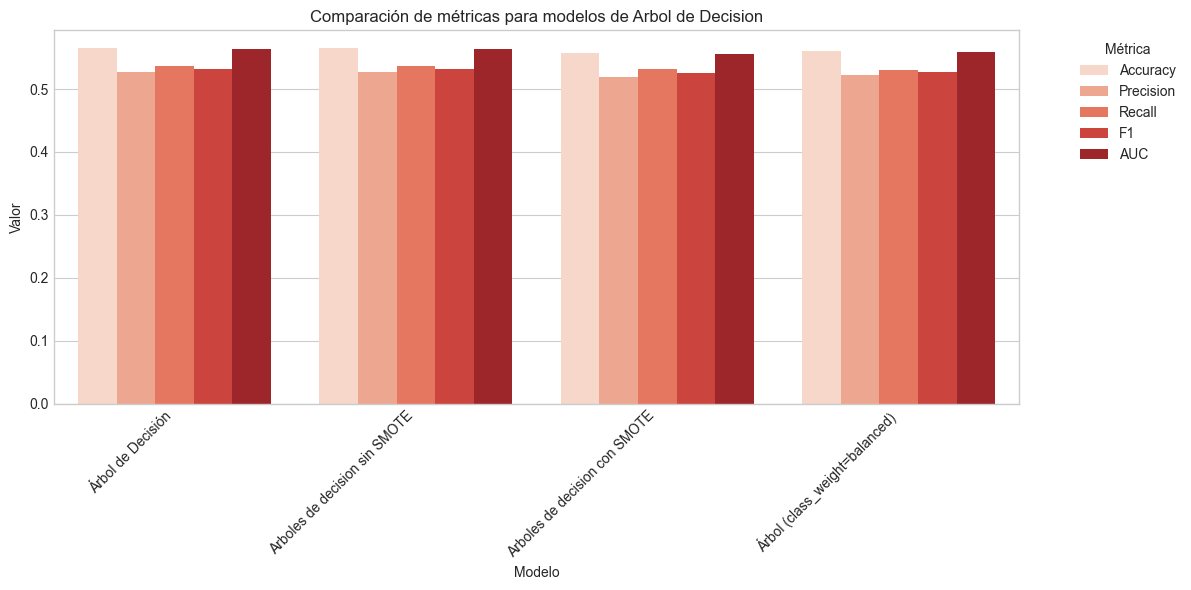

In [81]:
df_arbol_sorted = df_arbol.sort_values("Recall", ascending=False)
metricas = ["Accuracy", "Precision", "Recall", "F1", "AUC"]
df_arbol_long = df_arbol_sorted.melt(id_vars="Modelo", value_vars=metricas)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_arbol_long, x="Modelo", y="value", hue="variable", palette="Reds")
plt.title("Comparación de métricas para modelos de Arbol de Decision")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


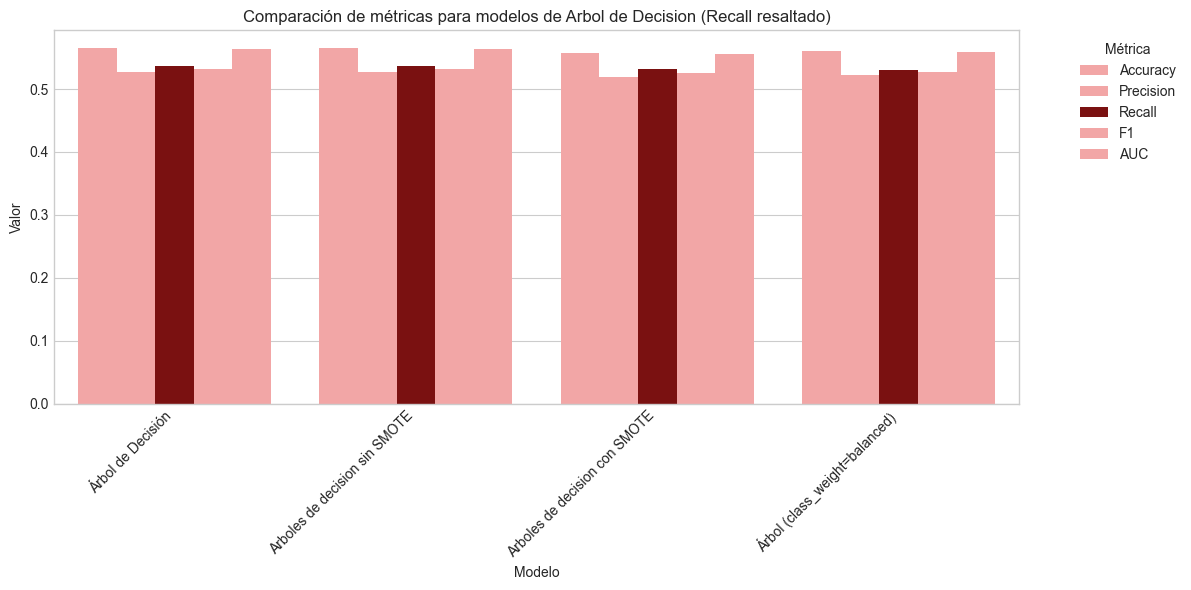

In [82]:
palette = {m: "#8B0000" if m=="Recall" else "#FF9999" for m in metricas}

plt.figure(figsize=(12, 6))
sns.barplot(data=df_arbol_long, x="Modelo", y="value", hue="variable", palette=palette)
plt.title("Comparación de métricas para modelos de Arbol de Decision (Recall resaltado)")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## **6.5 Comparacion global de Random Forest**

In [83]:
df_rf = df_todos[df_todos["Modelo"].str.contains("random", case=False, na=False)].copy()

print(f"Se encontraron {len(df_knn)} modelos de Random Forest:")
display(df_rf.sort_values("Recall", ascending=False))

Se encontraron 8 modelos de Random Forest:


,Modelo,Accuracy,Precision,Recall,F1,AUC,Grupo
23,RandomForest con class_weight=balanced,0.623514,0.585746,0.625520,0.604980,0.677233,Balanceo
22,RandomForest con SMOTE,0.626167,0.603674,0.549941,0.575556,0.677890,Balanceo
21,RandomForest sin balanceo,0.630343,0.611371,0.543332,0.575347,0.679314,Balanceo
2,Random Forest,0.630343,0.611371,0.543332,0.575347,0.679314,Benchmark


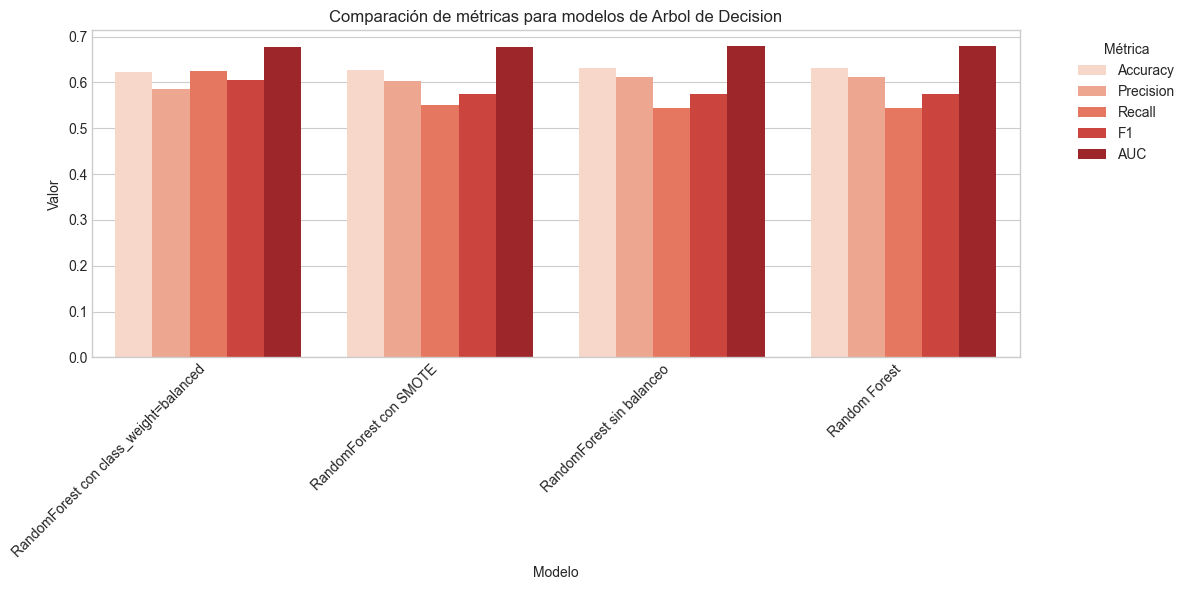

In [84]:
df_rf_sorted = df_rf.sort_values("Recall", ascending=False)
metricas = ["Accuracy", "Precision", "Recall", "F1", "AUC"]
df_rf_long = df_rf_sorted.melt(id_vars="Modelo", value_vars=metricas)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_rf_long, x="Modelo", y="value", hue="variable", palette="Reds")
plt.title("Comparación de métricas para modelos de Arbol de Decision")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


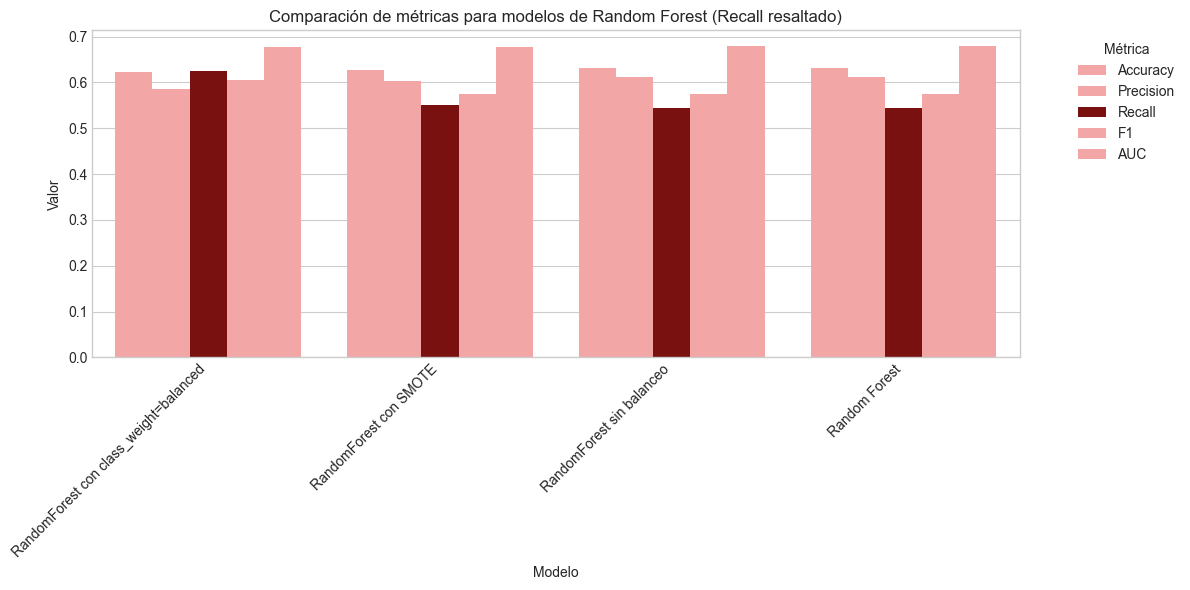

In [85]:
palette = {m: "#8B0000" if m=="Recall" else "#FF9999" for m in metricas}

plt.figure(figsize=(12, 6))
sns.barplot(data=df_rf_long, x="Modelo", y="value", hue="variable", palette=palette)
plt.title("Comparación de métricas para modelos de Random Forest (Recall resaltado)")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## **6.6 Comparacion global de XGBoost**

In [86]:
df_xgb = df_todos[df_todos["Modelo"].str.contains("xgb", case=False, na=False)].copy()

print(f"Se encontraron {len(df_xgb)} modelos de XGBoost:")
display(df_xgb.sort_values("Recall", ascending=False))

Se encontraron 8 modelos de XGBoost:


,Modelo,Accuracy,Precision,Recall,F1,AUC,Grupo
30,XGBoost - scale_pos_weight + Reg(L1/L2),0.640611,0.605387,0.632555,0.618673,0.694835,Optimización
31,XGBoost - scale_pos_weight + tree_method=hist,0.635305,0.599837,0.627012,0.613123,0.686689,Optimización
32,XGBoost - scale_pos_weight,0.643608,0.610631,0.625733,0.618090,0.697293,Optimización
33,XGBoost - scale_pos_weight + tree_method=gpu_hist,0.643461,0.610717,0.624454,0.617509,0.697477,Optimización
26,XGBoost con scale_pos_weight,0.640709,0.610023,0.611129,0.610576,0.694900,Balanceo
25,XGBoost con SMOTE,0.642183,0.632216,0.534698,0.579382,0.693158,Balanceo
3,XGBoost,0.644492,0.642753,0.514764,0.571682,0.695602,Benchmark
24,XGBoost sin balanceo,0.644492,0.642753,0.514764,0.571682,0.695602,Balanceo


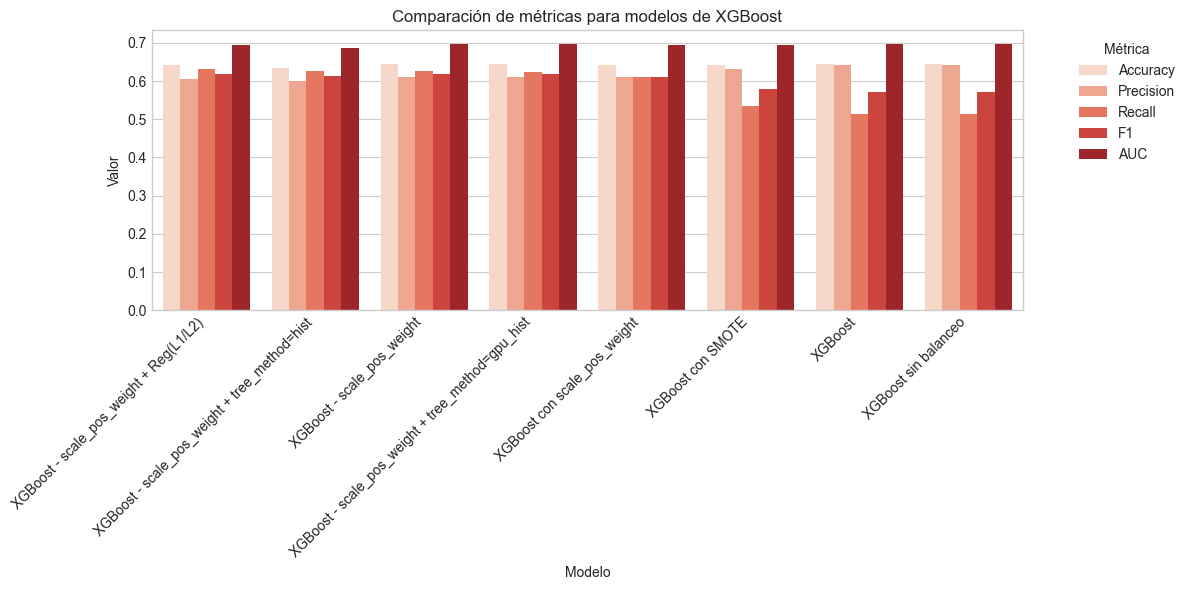

In [87]:
df_xgb_sorted = df_xgb.sort_values("Recall", ascending=False)
metricas = ["Accuracy", "Precision", "Recall", "F1", "AUC"]
df_xgb_long = df_xgb_sorted.melt(id_vars="Modelo", value_vars=metricas)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_xgb_long, x="Modelo", y="value", hue="variable", palette="Reds")
plt.title("Comparación de métricas para modelos de XGBoost")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


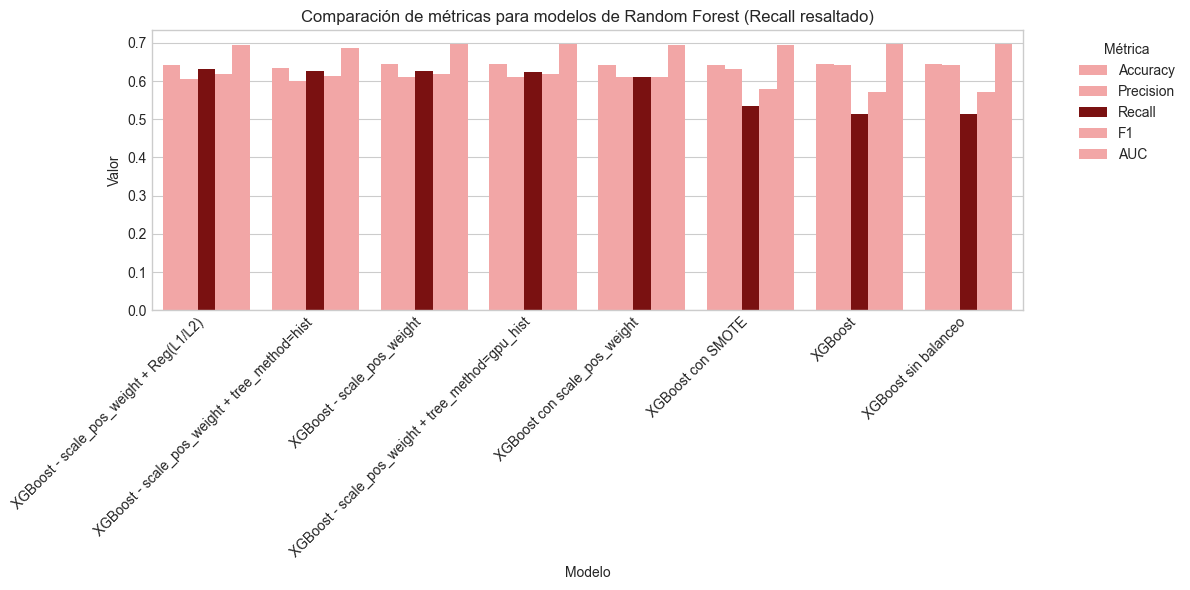

In [88]:
palette = {m: "#8B0000" if m=="Recall" else "#FF9999" for m in metricas}

plt.figure(figsize=(12, 6))
sns.barplot(data=df_xgb_long, x="Modelo", y="value", hue="variable", palette=palette)
plt.title("Comparación de métricas para modelos de Random Forest (Recall resaltado)")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## **6.7 Comparacion global de SVM**

In [89]:
df_svm = df_todos[df_todos["Modelo"].str.contains("svm", case=False, na=False)].copy()

print(f"Se encontraron {len(df_svm)} modelos de SVM:")
display(df_svm.sort_values("Recall", ascending=False))

Se encontraron 8 modelos de SVM:


,Modelo,Accuracy,Precision,Recall,F1,AUC,Grupo
28,SVM con SMOTE,0.643461,0.611065,0.622855,0.616903,0.692940,Balanceo
34,SVM - RBF + SMOTE,0.643461,0.611065,0.622855,0.616903,0.692940,Optimización
29,SVM con class_weight=balanced,0.646900,0.617553,0.614327,0.615935,0.694235,Balanceo
35,SVM - SGDClassifier + SMOTE,0.617815,0.581024,0.612301,0.596253,NaN,Optimización
36,SVM - RBF (RFF Approx) + SMOTE,0.623416,0.591006,0.593967,0.592482,NaN,Optimización
37,SVM - LinearSVC + SMOTE,0.624005,0.592327,0.590875,0.591600,NaN,Optimización
4,SVM,0.640366,0.645819,0.486515,0.554961,0.691903,Benchmark
27,SVM sin balanceo,0.640366,0.645819,0.486515,0.554961,0.691903,Balanceo


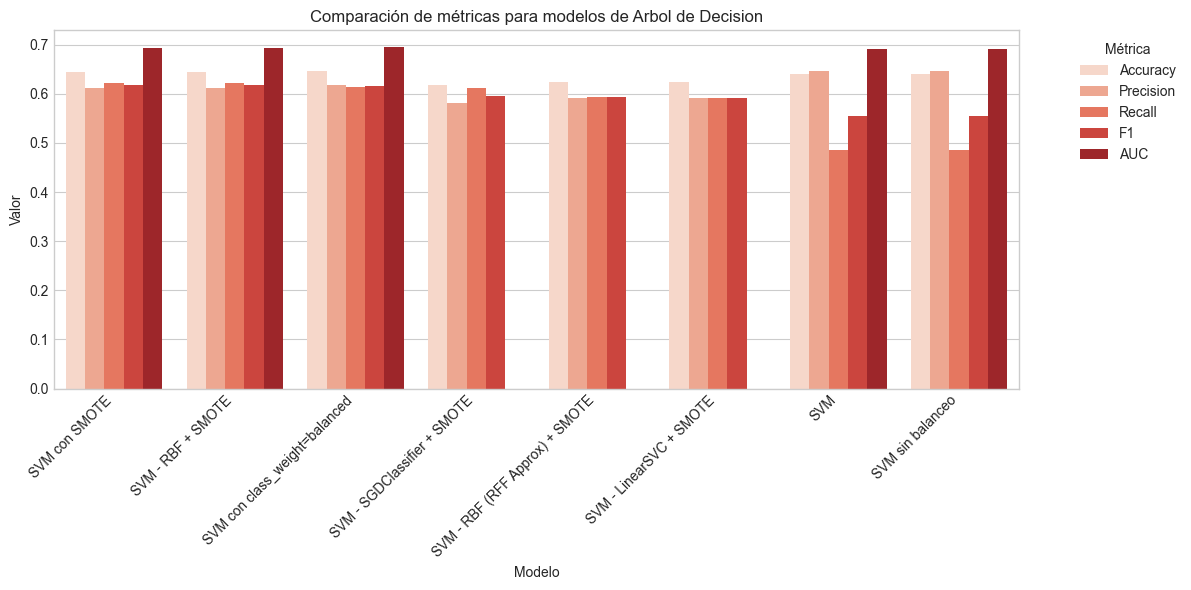

In [90]:
df_svm_sorted = df_svm.sort_values("Recall", ascending=False)
metricas = ["Accuracy", "Precision", "Recall", "F1", "AUC"]
df_svm_long = df_svm_sorted.melt(id_vars="Modelo", value_vars=metricas)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_svm_long, x="Modelo", y="value", hue="variable", palette="Reds")
plt.title("Comparación de métricas para modelos de Arbol de Decision")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


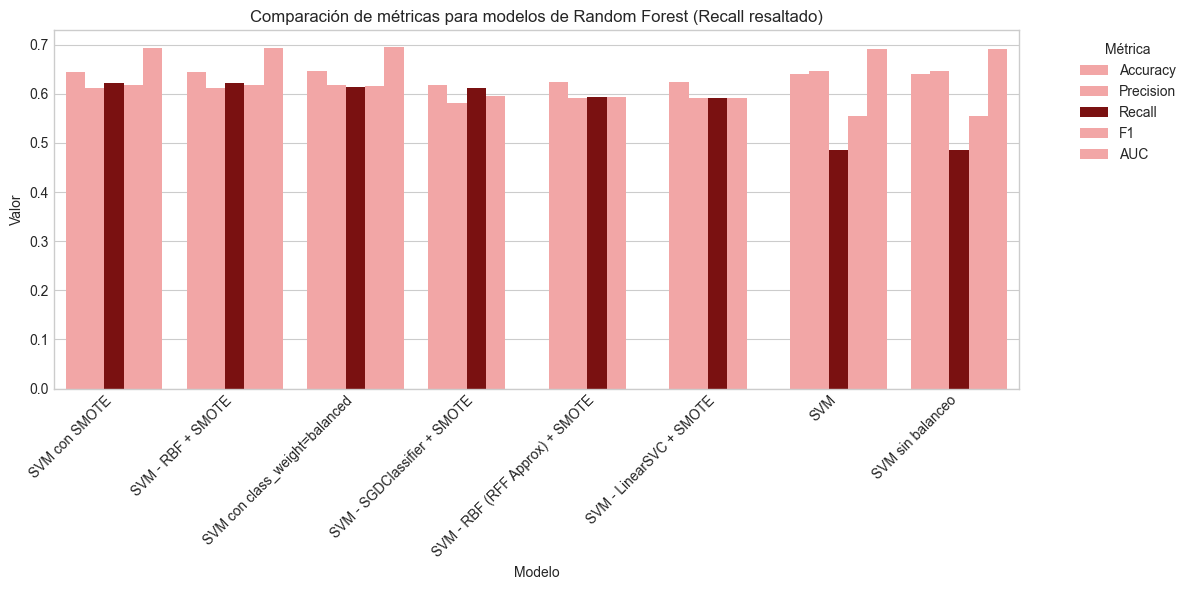

In [91]:
palette = {m: "#8B0000" if m=="Recall" else "#FF9999" for m in metricas}

plt.figure(figsize=(12, 6))
sns.barplot(data=df_svm_long, x="Modelo", y="value", hue="variable", palette=palette)
plt.title("Comparación de métricas para modelos de Random Forest (Recall resaltado)")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
